# Finding special explosible groups and unsaturations

In [31]:
from explosivity_and_unsaturations import findgroups, findinsaturation
# Importing our two functions

Those function accepts a molecule smiles

They output a dictionary containing for keys the *SMARTS* for the groups of interests (unsaturations and explosible groups), and for values tuples containing the indexes of the found insaturations atoms involved in the unsaturations and explosible groups


Let's try those functions on the nitrotetrazole molecule of smiles "C1=NN=NN1\[N+](=O)[O-]" 

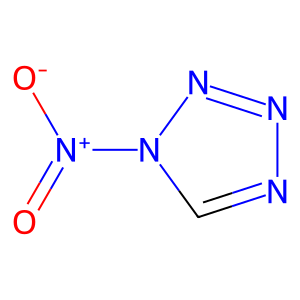

In [27]:
# Making sure to be able to display the molecule
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 300,300

smiles = "C1=NN=NN1[N+](=O)[O-]"
# This is the smiles for nitrotetrazole
mol = Chem.MolFromSmiles(smiles)
# Creating the rdkit molecule object from the smiles
mol

We can graphicaly find the unsaturations and explosible groups in the molecule, but we can ask the function to make a dictionary to match for us the substructures.

In [28]:
dico = findgroups(smiles)
dico

{'[#6]#[#6]': (),
 '[#6]=[#6]-[#6]=[#6]': (),
 '[#6-]': (),
 '[#6]-[Mg]': (),
 '[#6]-[Li]': (),
 '[#6]-[Cu]': (),
 '[#6]-[Ni]': (),
 '[#7-]-[#7+]#[#7]': (),
 '[#7]=[#7+]=[#7-]': (),
 '[#7]-[#7+]=[#7-][#7]=[#7]': (),
 'nn': ((1, 2), (2, 3), (3, 4)),
 '[#7-]#[#7]': (),
 '[#7]-[#7]': ((4, 5),),
 '[#8]-[#8]': (),
 '[#8]-[#8]-[#8]': (),
 '[#6]-1-[#8]-[#8]-[#6]-[#8]-1': (),
 '[#7]-[#8]': ((5, 7),),
 '[#7]=[#8]': ((5, 6),),
 '[#7]#[#8]': (),
 '[#7]-[I]': (),
 '[#7]-[Br]': (),
 '[#7]-[Cl]': (),
 '[#7]-[F]': (),
 '[#7]=[I]': (),
 '[#7]=[Br]': (),
 '[#7]=[Cl]': (),
 '[#7]=[F]': (),
 '[#8]-[I]': (),
 '[#8]-[F]': (),
 '[#8]-[Br]': (),
 '[#8]-[Cl]': (),
 '[#8]=[I]': (),
 '[#8]=[Br]': (),
 '[#8]=[Cl]': (),
 '[#8]=[F]': (),
 '[#6]#[#7+]-[#8-]': (),
 '[Ag+].[N-3]': ()}

We can see that the dictionary is mostly empty, except for the *SMARTS* 

- nn = aromatic Nitrogen-Nitrogen bond
- [#7]-[#8] = single Nitrogen-Oxygen bond
- [#7]=[#8] = double Nitrogen-Oxygen bond
- [#7]-[#7] = single Nitrogen-Nitrogen bond



Lets try the **findinsaturation** function on the same molecule

In [30]:
dico = findinsaturation(smiles)
dico

{'[*]=[*]': ((5, 6),),
 '[*]#[*]': (),
 'aa': ((0, 1), (0, 4), (1, 2), (2, 3), (3, 4)),
 '[*]@[*]': ((0, 1), (0, 4), (1, 2), (2, 3), (3, 4))}

The dictionary found double bonds and aromatic bonds. 

Why are the results for 'aa' and '[\*]@[*]' the same ?

'aa' is an aromatic bond under smiles notation, and '[\*]@[*]' is aromatic under smarts notation.
Like this no edge cases are missed. 

### What groups can be found by *findgroups* ?

The function can find:
- acetylides
- 1,3-dienes
- Grignard and organilithium reagents
- azide and azo compounds
- diazonium salts
- hydrazines
- peroxides
- ozodides
- hydroxylamines
- nitrates, nitrites
- N-oxydes
- oxazole
- hypochlorites, chlorites, chlorates, perchlorates
- fluoramines, chloramines, bromamines, iodamines
- fulminates
- silver nitride